## Dimensionality reduction
### 1. LDA

In [21]:
#wine data with linear discriminant analysis
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import colors
# %% Read data from csv file
A = np.loadtxt('winedata.txt', delimiter=',')
#Get the targets (first column of file)
y = A[:, 0]
#Remove targets from input data
A = A[:, 1:]

C:\Users\Jaeseok\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(A, y)
drA = lda.transform(A)

In [23]:
# %% Data extracted; perform LDA
lda = LinearDiscriminantAnalysis()
k_fold = cross_validation.KFold(len(A), 3, shuffle=True)
print('LDA Results: ')
for (trn, tst) in k_fold:
    lda.fit(A[trn], y[trn])
    outVal = lda.score(A[tst], y[tst])
    #Compute classification error
print('Score: ' + str(outVal))

LDA Results: 
Score: 0.983050847458


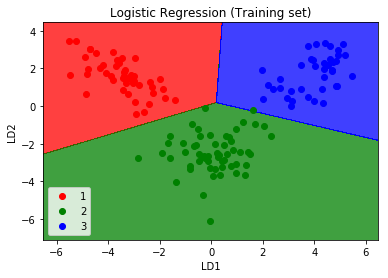

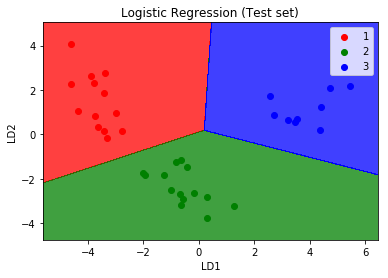

In [105]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Import the dataset
dataset = pd.read_table('winedata.txt', sep=",", header=None)
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Feature Scaling to Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Implement LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Train Logistic Regression with LDA
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict Results of Regression with LDA
y_pred = classifier.predict(X_test)

# Confusion Matrix 3X3
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Regression Result on Training Set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Visualising the Regression Result on Testing Set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

### 2. QDA
- LDA와 QDA 비교

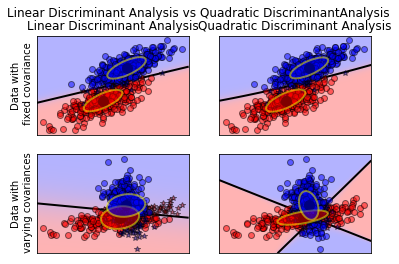

In [5]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red', markeredgecolor='k')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000', markeredgecolor='k')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue', markeredgecolor='k')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099', markeredgecolor='k')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10, markeredgecolor='k')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='yellow',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')

for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant'
             'Analysis')
plt.show()

C:\Users\Jaeseok\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)


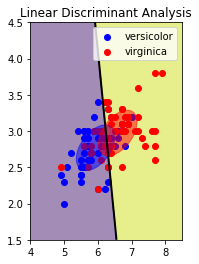

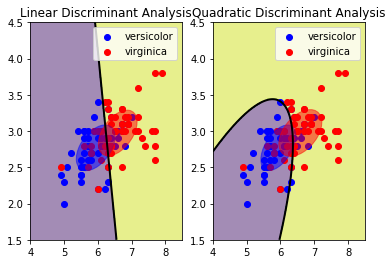

In [7]:
#iris data comparision
from scipy import linalg
import numpy as np
import pylab as pl
import matplotlib as mpl

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,:2] # Take only 2 dimensions
y = iris.target
X = X[y > 0]
y = y[y > 0]
y -= 1
target_names = iris.target_names[1:]

# LDA
lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=True)
y_pred = lda.fit(X, y).predict(X)

# QDA
qda = QuadraticDiscriminantAnalysis(store_covariances = True)
y_pred = qda.fit(X, y).predict(X)

def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi # convert to degrees
    # filled gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

xx, yy = np.meshgrid(np.linspace(4, 8.5, 200), np.linspace(1.5, 4.5, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_lda = lda.predict_proba(X_grid)[:,1].reshape(xx.shape)
zz_qda = qda.predict_proba(X_grid)[:,1].reshape(xx.shape)

pl.figure()
splot = pl.subplot(1, 2, 1)
pl.contourf(xx, yy, zz_lda > 0.5, alpha=0.5)
pl.scatter(X[y==0,0], X[y==0,1], c='b', label=target_names[0])
pl.scatter(X[y==1,0], X[y==1,1], c='r', label=target_names[1])
pl.contour(xx, yy, zz_lda, [0.5], linewidths=2., colors='k')
plot_ellipse(splot, lda.means_[0], lda.covariance_, 'b')
plot_ellipse(splot, lda.means_[1], lda.covariance_, 'r')
pl.legend()
pl.axis('tight')
pl.title('Linear Discriminant Analysis')

splot = pl.subplot(1, 2, 2)
pl.contourf(xx, yy, zz_qda > 0.5, alpha=0.5)
pl.scatter(X[y==0,0], X[y==0,1], c='b', label=target_names[0])
pl.scatter(X[y==1,0], X[y==1,1], c='r', label=target_names[1])
pl.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'b')
plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'r')
pl.legend()
pl.axis('tight')
pl.title('Quadratic Discriminant Analysis')
pl.show()

### 3. Kernel PCA
- SVM에서 사용한 kernel trick을 PCA에 적용
- 차원축소에 복잡한 non-linear projection이 가능하다.

#### Manifold learning
- manifold hypothesis : 고차원 데이터 셋은 저차원을 트위스트하면 고차원과 유사한 형태를 만들수 있음.
- sklearn에서 swiss_roll data가 대표적인 예시

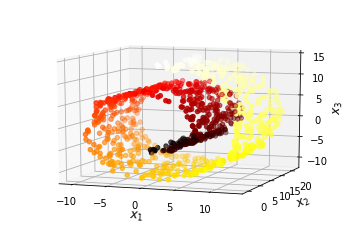

In [31]:
#data visualization
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
X, t = make_swiss_roll(n_samples = 1000, noise =0.2, random_state = 80)
axes = [-11.5, 14, -2, 23,-12,15]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap = plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize = 12)
ax.set_ylabel("$x_2$", fontsize = 12)
ax.set_zlabel("$x_3$", fontsize = 12)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

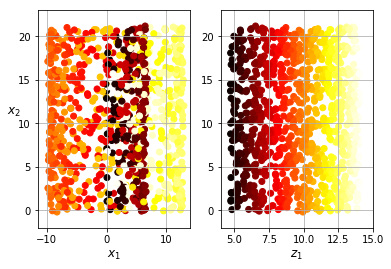

In [32]:
#그냥 투영한 그림
plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12, rotation=0)
plt.grid(True)

#펼친 그림
plt.subplot(122)
plt.scatter(t, X[:,1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=12)
plt.grid(True)

plt.show()

In [45]:
from sklearn.decomposition import KernelPCA
X, t = make_swiss_roll(n_samples=1000, noise = 0.2, random_state=42)

#rbf kernel
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04) #gamma : hyperparams
X_reduced = rbf_pca.fit_transform(X)
X_reduced

array([[ 0.20318153, -0.04192012],
       [ 0.12291985, -0.08891651],
       [-0.06294914, -0.06770846],
       ..., 
       [ 0.01755176,  0.50273796],
       [ 0.09990453,  0.00253754],
       [ 0.19161337, -0.0417062 ]])

In [46]:
#3d -> 2d reduction
print(X.shape, X_reduced.shape)

(1000, 3) (1000, 2)


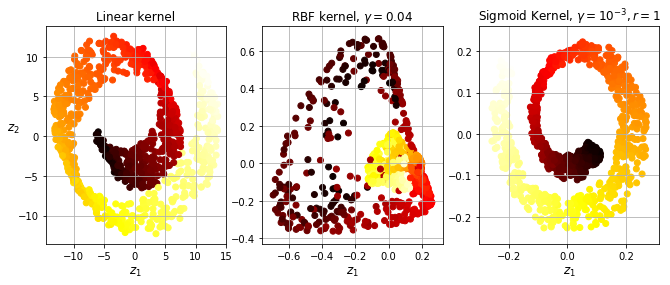

In [47]:
#kernel 비교
lin_pca = KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True) 
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, coef0=1, fit_inverse_transform=True) 

y = t > 6.9

plt.figure(figsize=(11,4))
for subplot, pca, title in ((131, lin_pca, 'Linear kernel'), (132, rbf_pca, 'RBF kernel, $\gamma=0.04$'),\
                            (133, sig_pca, 'Sigmoid Kernel, $\gamma=10^{-3}, r=1$')):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
        
    plt.subplot(subplot)
    plt.title(title, fontsize = 12)
    plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap = plt.cm.hot)
    plt.xlabel('$z_1$', fontsize = 12)
    if subplot == 131:
        plt.ylabel('$z_2$', fontsize = 12, rotation =0)
    plt.grid(True)

plt.show()

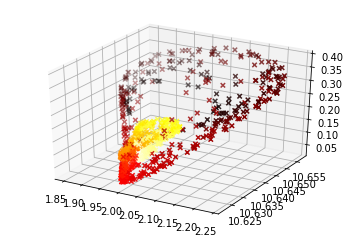

In [50]:
#rbf kernel을 확인해보자.
plt.figure()

X_inverse = pca.inverse_transform(X_reduced_rbf)
axe = plt.subplot(111, projection ='3d')
axe.scatter(X_inverse[:, 0], X_inverse[:,1], X_inverse[:,2], c=t, cmap = plt.cm.hot, marker ='x')
plt.show()

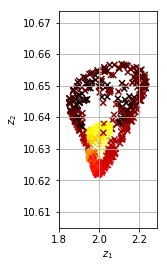

In [53]:
#3차원 그래프를 projection한 그림
X_reduced = rbf_pca.fit_transform(X)
plt.figure()
plt.subplot(132)
plt.scatter(X_inverse[:, 0], X_inverse[:,1], c=t, cmap = plt.cm.hot, marker ='x')
plt.xlabel('$z_1$', fontsize = 10)
plt.ylabel('$z_2$', fontsize = 10)
plt.grid(True)
plt.show()

In [79]:
#selecting kernel and tuning hyperparams

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('kernel_pca' , KernelPCA(n_components=2)),
    ('logit_reg' , LogisticRegression())])

param_grid = [{'kernel_pca__gamma' : np.linspace(0.03, 0.05, 10), 'kernel_pca__kernel' : ['rbf', 'sigmoid', 'linear']}]

grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kernel_pca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('logit_reg', Logis...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel_pca__gamma': array([ 0.03   ,  0.03222,  0.03444,  0.03667,  0.03889,  0.04111,
        0.04333,  0.04556,  0.04778,  0.05   ]), 'kernel_pca__kernel': ['rbf', 'sigmoid', 'linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [80]:
print(grid_search.best_params_)

{'kernel_pca__gamma': 0.045555555555555557, 'kernel_pca__kernel': 'rbf'}


In [78]:
#clf.get_params().keys()

dict_keys(['memory', 'steps', 'kernel_pca', 'logit_reg', 'kernel_pca__alpha', 'kernel_pca__coef0', 'kernel_pca__copy_X', 'kernel_pca__degree', 'kernel_pca__eigen_solver', 'kernel_pca__fit_inverse_transform', 'kernel_pca__gamma', 'kernel_pca__kernel', 'kernel_pca__kernel_params', 'kernel_pca__max_iter', 'kernel_pca__n_components', 'kernel_pca__n_jobs', 'kernel_pca__random_state', 'kernel_pca__remove_zero_eig', 'kernel_pca__tol', 'logit_reg__C', 'logit_reg__class_weight', 'logit_reg__dual', 'logit_reg__fit_intercept', 'logit_reg__intercept_scaling', 'logit_reg__max_iter', 'logit_reg__multi_class', 'logit_reg__n_jobs', 'logit_reg__penalty', 'logit_reg__random_state', 'logit_reg__solver', 'logit_reg__tol', 'logit_reg__verbose', 'logit_reg__warm_start'])

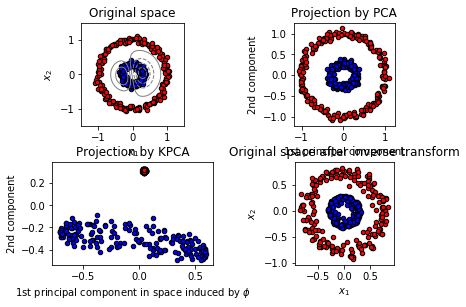

In [84]:
#lda와 kpca 비교
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

plt.show()

### Homework 

#### LDA implement
##### 직접 LDA를 구현해보세요
1. 특정 차원의 mean vectors를 계산
2. Scatter matrice (분산)을 계산
3. matrix에 대해서 고유값, 고유벡터를 구하세요
4. 새로운 부분공간에 대해서 linear discriminant를 결정하세요
5. 새로운 부분공간에 대해서 sample을 변환하세요